# Manutenção Preditiva (PHM) - Sistema de Propulsão Naval

Grupo: Rafael Schena e Gustavo Loguércio

## Metodologia

Foi utilizada neste trabalho a metodologia CRISP-DM (CRoss-Industry Standard Process for Data Mining)
![crisp-dm](img/crisp-dm.png)

Fases:
1. Business understanding – What does the business need?
2. Data understanding – What data do we have / need? Is it clean?
3. Data preparation – How do we organize the data for modeling?
4. Modeling – What modeling techniques should we apply?
5. Evaluation – Which model best meets the business objectives?
6. Deployment – How do stakeholders access the results?

(https://www.datascience-pm.com/crisp-dm-2/)

## 1 - Compreensão do problema de negócio (Business Understanding)
Este trabalho tem como objetivo principal a mineração de padrões em dados de manutenção preditiva (PHM - Predictive Health Monitoring) em um sistema de propulsão naval. O dataset utilizado foi disponibilizado é um dataset simulado em um modelo de um sistema de propulsão naval de uma fragata que utiliza uma turbina a gás como motor. O dataset foi disponibilizado pelos autores (M Altosole, G Benvenuto, M Figari, and U Campora) no repositório da UCI: http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants

Fragata:
![fragata](img/frigate.png)

Sistema de propulsão:
![propulsao](img/propulsion.png)
https://navalpost.com/propulsion-systems-navies-gas-diesel-electric/

Turbina a Gás (Termo mais correto: motor a reação):
![turbina](img/gas_turbine.png)
https://www.geaviation.com/sites/default/files/ge-marine-gas-turbines-for-frigates-2018-march.pdf

![mecanismo](img/turbine_mechanism.gif)

## Definição do problema de negócio (!!!)
O dataset não define o que caracteriza ou não uma falha no sistema de propulsão da fragata, apenas apresenta os índices de degradação dos estágios de compressão e da turbina. **Níveis de alerta de degradação serão definidos com base na distribuição dos índices de degradação do compressor (kMc) e da turbina (kMt).** Antes disso, será necessária uma melhor compreensão dos dados.

Dicionário de dados:
- 1 - Lever position (lp) [ ]
- 2 - Ship speed (v) [knots]
- 3 - Gas Turbine shaft torque (GTT) [kN m]
- 4 - Gas Turbine rate of revolutions (GTn) [rpm]
- 5 - Gas Generator rate of revolutions (GGn) [rpm]
- 6 - Starboard Propeller Torque (Ts) [kN]
- 7 - Port Propeller Torque (Tp) [kN]
- 8 - HP Turbine exit temperature (T48) [C]
- 9 - GT Compressor inlet air temperature (T1) [C]
- 10 - GT Compressor outlet air temperature (T2) [C]
- 11 - HP Turbine exit pressure (P48) [bar]
- 12 - GT Compressor inlet air pressure (P1) [bar]
- 13 - GT Compressor outlet air pressure (P2) [bar]
- 14 - Gas Turbine exhaust gas pressure (Pexh) [bar]
- 15 - Turbine Injecton Control (TIC) [%]
- 16 - Fuel flow (mf) [kg/s]
- 17 - GT Compressor decay state coefficient (kMc).
- 18 - GT Turbine decay state coefficient (kMt). 

## 2 - Compreensão dos dados (Data Understanding)

In [1]:
import pandas as pd
import numpy as np

In [2]:
features = [
    'lp',
    'v',
    'GTT',
    'GTn',
    'GGn',
    'Ts',
    'Tp',
    'T48',
    'T1',
    'T2',
    'P48',
    'P1',
    'P2',
    'Pexh',
    'TIC',
    'mf',
    'kMc',
    'kMt'
]

In [3]:
df = pd.read_csv('./data/data.txt', sep='   ', names=features, engine='python')

In [4]:
df.head()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [5]:
df.shape

(11934, 18)

### Verificação valores faltantes e tipos de dados

In [6]:
# Não há valores faltantes, todas as variáveis são numéricas do tipo float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lp      11934 non-null  float64
 1   v       11934 non-null  float64
 2   GTT     11934 non-null  float64
 3   GTn     11934 non-null  float64
 4   GGn     11934 non-null  float64
 5   Ts      11934 non-null  float64
 6   Tp      11934 non-null  float64
 7   T48     11934 non-null  float64
 8   T1      11934 non-null  float64
 9   T2      11934 non-null  float64
 10  P48     11934 non-null  float64
 11  P1      11934 non-null  float64
 12  P2      11934 non-null  float64
 13  Pexh    11934 non-null  float64
 14  TIC     11934 non-null  float64
 15  mf      11934 non-null  float64
 16  kMc     11934 non-null  float64
 17  kMt     11934 non-null  float64
dtypes: float64(18)
memory usage: 1.6 MB


### Estatísticas das features numéricas

In [7]:
df.describe()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


### Verificando a presença de outliers nos dados

In [8]:
import matplotlib.pyplot as plt

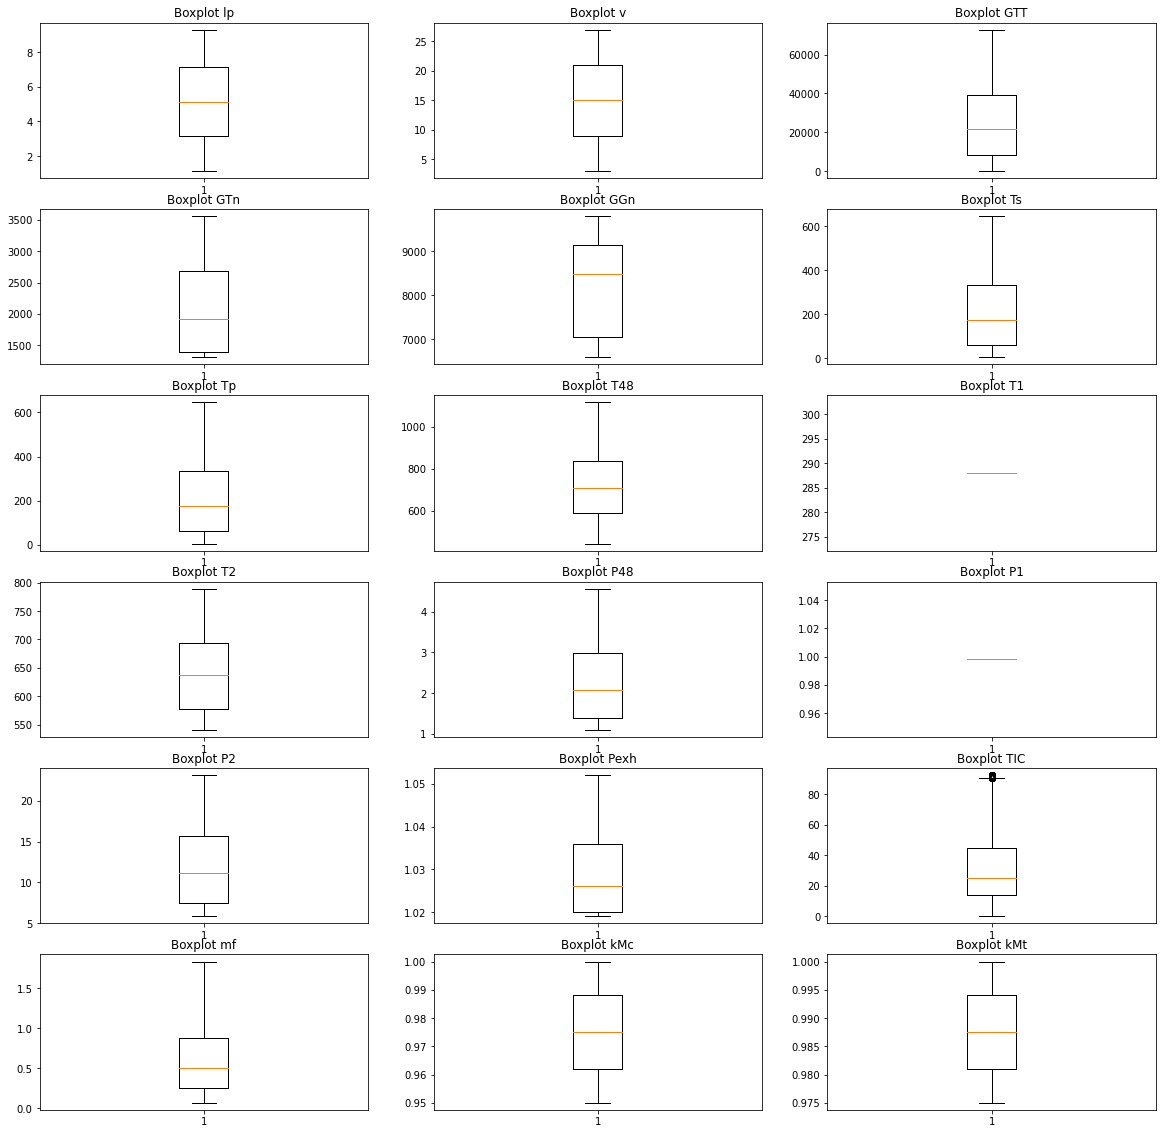

In [9]:
fig, ax_matrix = plt.subplots(6, 3, figsize=(20, 20));

# Atribuir um subgráfico para cada feature
mapeamento = {}
for (i, f) in enumerate(features):
    mapeamento[f] = ax_matrix[i//3][i%3]

for feat in features:
    mapeamento[feat].set_title(f'Boxplot {feat}')
    mapeamento[feat].boxplot(df[feat])
    
plt.show()

### Constatações:
- As features T1 e P1 não apresentam variabilidade e podem ser eliminadas do dataset, porque não contribuem para a previsibilidade das variáveis target;
- A feature TIC apresenta outliers que merecem ser investigados mais a fundo;

## Verificação da distribuição dos dados

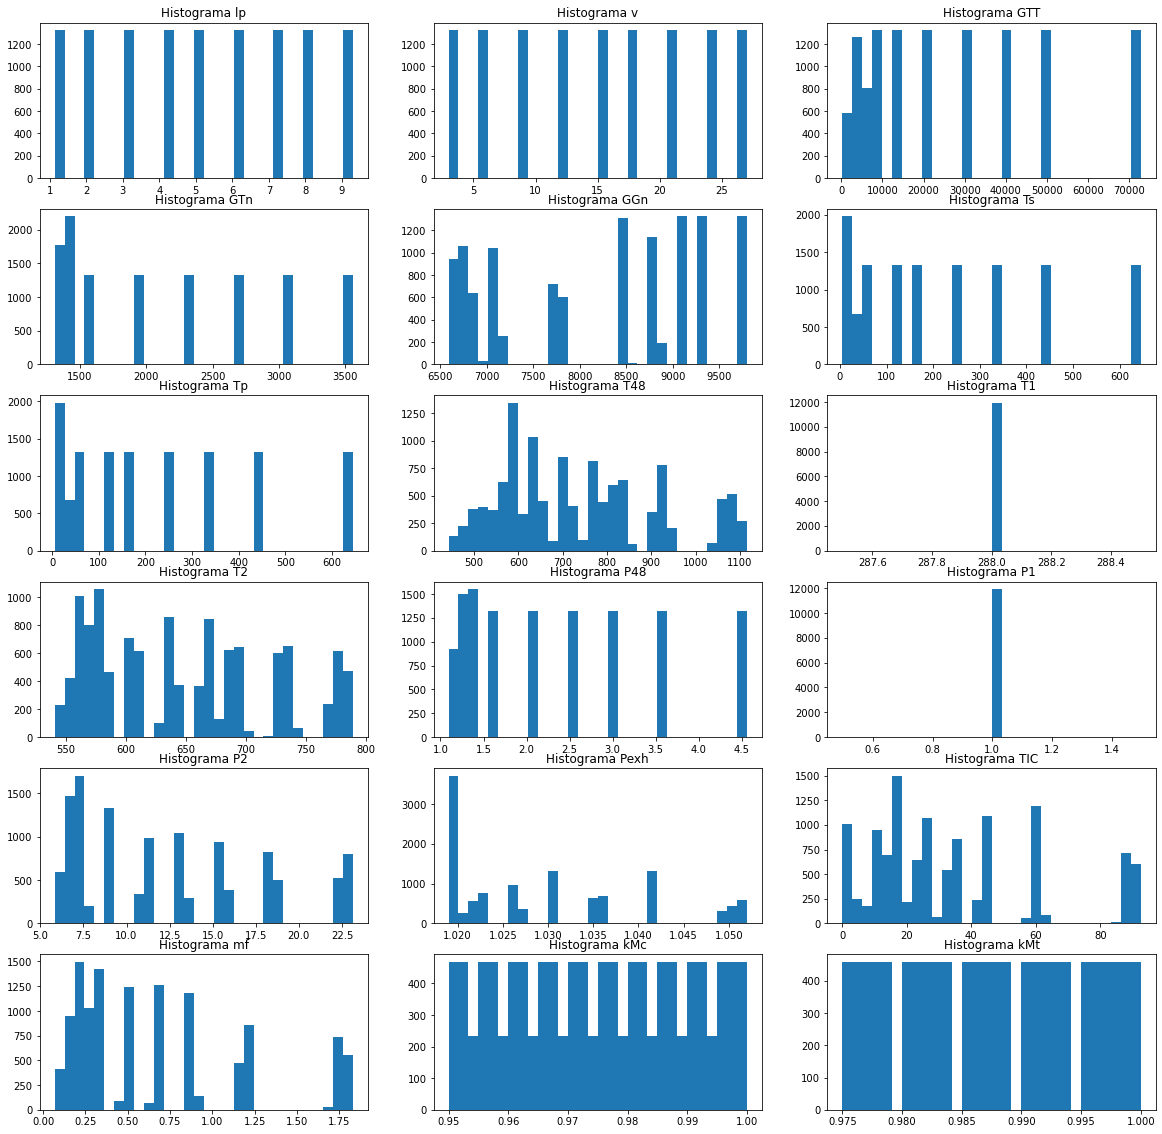

In [10]:
fig, ax_matrix = plt.subplots(6, 3, figsize=(20, 20));

# Atribuir um subgráfico para cada feature
mapeamento = {}
for (i, f) in enumerate(features):
    mapeamento[f] = ax_matrix[i//3][i%3]

for feat in features:
    mapeamento[feat].set_title(f'Histograma {feat}')
    mapeamento[feat].hist(df[feat], bins=30)
    
plt.show()

### Constatações
- Os dados não se apresentam na forma de séries temporais, uma vez que não têm associado um timestamp e nenhuma indicação de que estão em uma sequência no tempo;
- Na distribuição estatística dos dados (histogramas) podem ser verificados muitos gaps, indicando que existem faixas de valores que não constam no conjunto de dados, apesar de se tratar de um dataset composto somente por variáveis contínuas. Tal característica da distribuição dos dados permite que se efetue uma discretização destas grandezas com uma menor perda de informação (erro de quantização). Isto sugere que pode ser interessante a criação de novas features a partir da discretização das features originais.
- Faixas de variação muito diferentes entre as features;
- Os outliers da feature TIC representam os valores acima de 80% da capacidade de injeção de combustível na turbina. Representam os casos em que a fragata demandou uma aceleração maior e somam cerca de 1200 observações no dataset (aproximadamente 10% das observações). Decidiu-se por manter estes valores por representarem situações de operação normal do equipamento.

## (!!!) Definição do problema de negócio com base nos dados
Para os targets kMc e kMt fica **arbitrariamente** definido:
- **Emergência**: faixa de 33% piores valores possíveis para o range observado;
- **Alerta**: faixa entre 33% e 66% piores valores possíveis para o range observado;
- **Normal**: faixa de 33% melhores valores possíveis para o range observado.

In [11]:
range_kMc = df['kMc'].max() - df['kMc'].min()
lim_alert_comp = df['kMc'].min() + 0.66*range_kMc
lim_emerg_comp = df['kMc'].min() + 0.33*range_kMc

print(f'Urgência para manutenção do compressor: valores de kMc menores que {lim_alert_comp}')
print(f'Emergência para manutenção do compressor: valores de kMc menores que {lim_emerg_comp}')

Urgência para manutenção do compressor: valores de kMc menores que 0.983
Emergência para manutenção do compressor: valores de kMc menores que 0.9664999999999999


In [12]:
range_kMt = df['kMt'].max() - df['kMt'].min()
lim_alert_turb = df['kMt'].min() + 0.66*range_kMt
lim_emerg_turb = df['kMt'].min() + 0.33*range_kMt

print(f'Urgência para manutenção do turbina: valores de kMt menores que {lim_alert_turb}')
print(f'Emergência para manutenção do turbina: valores de kMt menores que {lim_emerg_turb}')

Urgência para manutenção do turbina: valores de kMt menores que 0.9915
Emergência para manutenção do turbina: valores de kMt menores que 0.98325


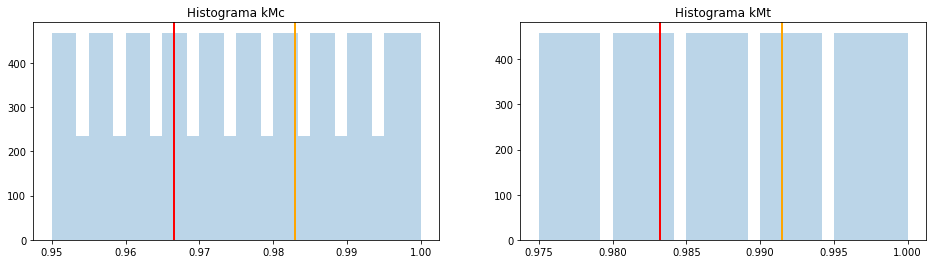

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].set_title(f'Histograma kMc')
ax[0].axvline(lim_alert_comp, color='orange', lw=2, alpha=1)
ax[0].axvline(lim_emerg_comp, color='red', lw=2, alpha=1)
ax[0].hist(df['kMc'], bins=30, alpha = 0.3);

ax[1].set_title(f'Histograma kMt')
ax[1].axvline(lim_alert_turb, color='orange', lw=2, alpha=1)
ax[1].axvline(lim_emerg_turb, color='red', lw=2, alpha=1)
ax[1].hist(df['kMt'], bins=30, alpha = 0.3);

# Relações entre as variáveis

In [14]:
import seaborn as sns

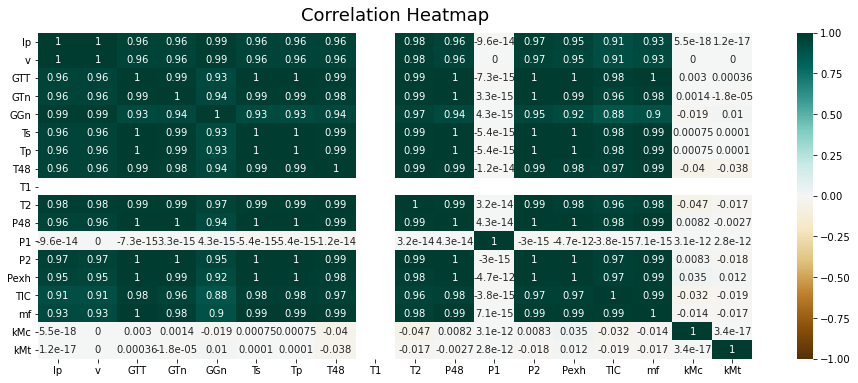

In [15]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Constatações
- Correlações muito baixas entre features e variáveis target;
- Correlações quase nulas entre as duas variáveis target;
- Correlações quase nulas entre as variáveis preditoras lp e v as variáveis target;
- Faixas de variação muito diferentes entre as features podem disfarçar as correlações; na verdade, o que importa são as variações destes sinais dentro do intervalo de excursão;
- Opção 1: normalizar os dados para trazer as variações para o mesmo intervalo de excursão;
- Opção 2: criar novas features retirando o nível constante e mantendo somente a variação (sinal).

## 3 - Preparação dos dados
Tarefas identificadas a serem executadas sobre o dataset antes da mineração de dados:
- Exclusão das features T1 e P1, que não apresentam variabilidade e não contribuem para o processo;
- Normalização dos dados (Trazer todas as distribuições em torno da média 0 e desvio padrão 1). Caso este procedimento não resolva o problema de baixa correlação entre as variáveis preditoras e as variáveis target, poderão ser criadas novas features baseadas em outras estratégias de pré-processamento, como por exemplo o MinMaxScaler, Discretização, etc.;
- Criação de labels com status 'Normal', 'Alerta' e 'Emergência' para as variáveis target;

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Teste das correlações com normalização em torno da média, com desvio padrão igual a 1.

In [17]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm)
df_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.193400e+04,11934.000000,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,11934.0,1.193400e+04,1.193400e+04,11934.0,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04
mean,1.973172e-16,0.000000,-6.184651e-17,3.167494e-16,9.429732e-16,-1.167344e-16,-1.167344e-16,2.852680e-16,0.0,3.131770e-16,-1.918656e-16,1.0,-2.325756e-18,7.145728e-15,1.459831e-16,-1.064638e-16,-1.983405e-17,-7.772566e-15
std,1.000042e+00,1.000042,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,0.0,1.000042e+00,1.000042e+00,0.0,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.533984e+00,-1.549193,-1.218816e+00,-1.070490e+00,-1.477128e+00,-1.107459e+00,-1.107459e+00,-1.687833e+00,0.0,-1.455473e+00,-1.161551e+00,1.0,-1.212076e+00,-1.008090e+00,-1.301892e+00,-1.172210e+00,-1.698416e+00,-1.666667e+00
25%,-7.701648e-01,-0.774597,-8.520807e-01,-9.683223e-01,-1.047059e+00,-8.330633e-01,-8.330633e-01,-8.384865e-01,0.0,-9.373940e-01,-8.886706e-01,1.0,-9.086882e-01,-9.118428e-01,-7.725830e-01,-8.212012e-01,-8.831761e-01,-8.666667e-01
50%,-1.015379e-02,0.000000,-2.536084e-01,-2.738361e-01,2.576212e-01,-2.597058e-01,-2.597058e-01,-1.696142e-01,0.0,-1.248586e-01,-2.488768e-01,1.0,-2.257959e-01,-3.343579e-01,-3.237101e-01,-3.282119e-01,0.000000e+00,-7.403800e-15
75%,7.544264e-01,0.774597,5.307068e-01,6.999402e-01,8.537382e-01,5.238680e-01,5.238680e-01,5.675646e-01,0.0,6.564925e-01,5.789831e-01,1.0,6.297049e-01,6.281168e-01,4.222570e-01,4.329636e-01,8.831761e-01,8.666667e-01
max,1.573837e+00,1.549193,2.056078e+00,1.840255e+00,1.462659e+00,2.084485e+00,2.084485e+00,2.189753e+00,0.0,1.966053e+00,2.034652e+00,1.0,2.031557e+00,2.168076e+00,2.279957e+00,2.306323e+00,1.698416e+00,1.666667e+00


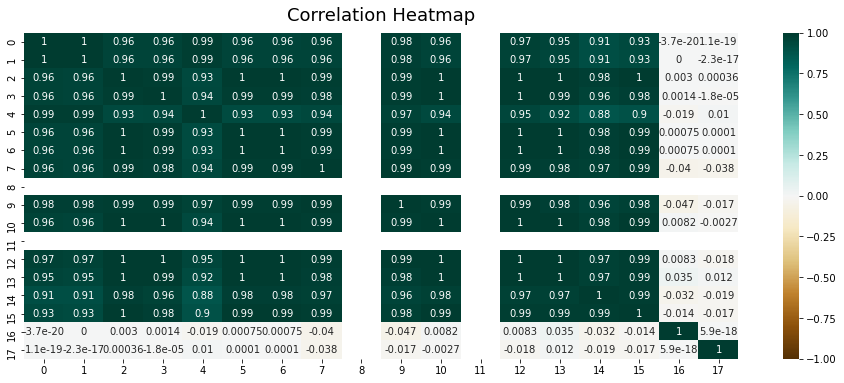

In [18]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_norm.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Teste das correlações com a padronização dos intervalos de excursão entre 0 e 1.

In [19]:
scalerMinMax = MinMaxScaler()
df_MinMax = scalerMinMax.fit_transform(df)
df_MinMax = pd.DataFrame(df_MinMax)
df_MinMax.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000
mean,0.493588,0.500000,0.372170,0.367772,0.502461,0.346954,0.346954,0.435279,0.0,0.425387,0.363416,0.0,0.373679,0.317392,0.363469,0.336984,0.500000,0.500000
std,0.321782,0.322762,0.305366,0.343569,0.340175,0.313302,0.313302,0.257903,0.0,0.292279,0.312884,0.0,0.308309,0.314858,0.279197,0.287490,0.294404,0.300013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245773,0.250000,0.111984,0.035100,0.146293,0.085965,0.085965,0.219040,0.0,0.151417,0.085376,0.0,0.093533,0.030303,0.147775,0.100907,0.240000,0.240000
50%,0.490321,0.500000,0.294729,0.273694,0.590093,0.265592,0.265592,0.391537,0.0,0.388895,0.285549,0.0,0.304067,0.212121,0.273094,0.242630,0.500000,0.500000
75%,0.736339,0.750000,0.534223,0.608240,0.792869,0.511076,0.511076,0.581650,0.0,0.617258,0.544563,0.0,0.567814,0.515152,0.481357,0.461451,0.760000,0.760000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


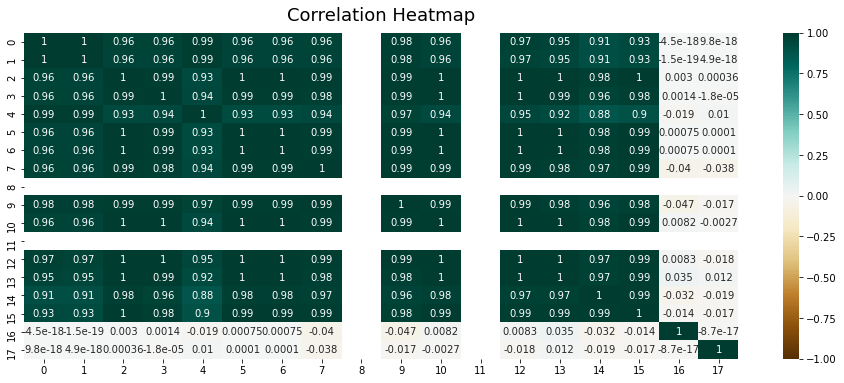

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_MinMax.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Teste das correlações com retirada do offset das variáveis preditoras

In [21]:
df_sem_offset = df - df.mean()
df_sem_offset.describe()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
count,1.193400e+04,11934.000000,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,11934.0,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04,1.193400e+04
mean,-2.526375e-13,0.000000,-1.610630e-10,2.520201e-12,4.694864e-12,-1.078520e-12,-1.078520e-12,-2.126555e-12,0.0,2.298381e-12,4.612098e-14,2.533529e-13,-1.600597e-14,-4.901083e-14,-9.651747e-14,3.570371e-15,4.604013e-14,2.092770e-14
std,2.626388e+00,7.746291,2.214861e+04,7.740839e+02,1.091316e+03,2.004959e+02,2.004959e+02,1.736806e+02,0.0,7.267588e+01,1.084770e+00,0.000000e+00,5.337448e+00,1.039032e-02,2.584136e+01,5.071316e-01,1.472022e-02,7.500314e-03
min,-4.028667e+00,-12.000000,-2.699395e+04,-8.286143e+02,-1.611945e+03,-2.220318e+02,-2.220318e+02,-2.931314e+02,0.0,-1.057733e+02,-1.259963e+00,2.533529e-13,-6.469123e+00,-1.047394e-02,-3.364126e+01,-5.944397e-01,-2.500000e-02,-1.250000e-02
25%,-2.022667e+00,-6.000000,-1.887161e+04,-7.495313e+02,-1.142623e+03,-1.670188e+02,-1.670188e+02,-1.456227e+02,0.0,-6.812308e+01,-9.639628e-01,2.533529e-13,-4.849873e+00,-9.473940e-03,-1.996376e+01,-4.164397e-01,-1.300000e-02,-6.500000e-03
50%,-2.666667e-02,0.000000,-5.616840e+03,-2.119633e+02,2.811342e+02,-5.206777e+01,-5.206777e+01,-2.945745e+01,0.0,-9.073831e+00,-2.699628e-01,2.533529e-13,-1.205123e+00,-3.473940e-03,-8.364761e+00,-1.664397e-01,4.540812e-14,2.092770e-14
75%,1.981333e+00,6.000000,1.175393e+04,5.417897e+02,9.316587e+02,1.050290e+02,1.050290e+02,9.857080e+01,0.0,4.770917e+01,6.280372e-01,2.533529e-13,3.360877e+00,6.526060e-03,1.091124e+01,2.195603e-01,1.300000e-02,6.500000e-03
max,4.133333e+00,12.000000,4.553737e+04,1.424452e+03,1.596156e+03,4.179132e+02,4.179132e+02,3.803016e+02,0.0,1.428787e+02,2.207037e+00,2.533529e-13,1.084288e+01,2.252606e-02,5.891474e+01,1.169560e+00,2.500000e-02,1.250000e-02


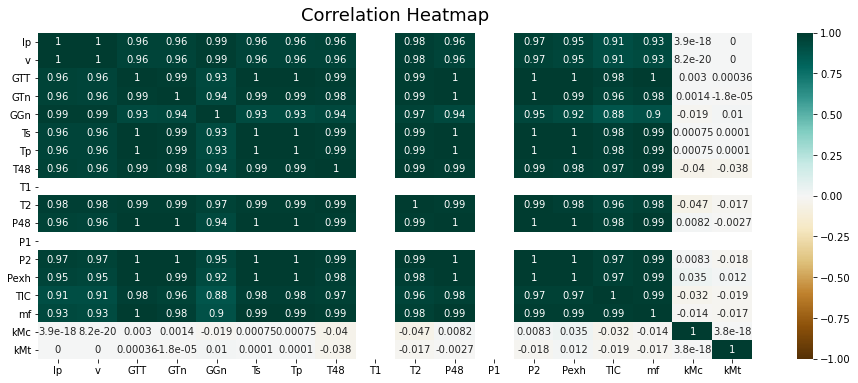

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_sem_offset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Teste das correlações com retirada do offset das variáveis preditoras com as variáveis no intervalo (-1, 1)

In [23]:
scalerMinMax_sem_offset = MinMaxScaler(feature_range=(-1, 1))

In [24]:
df_MinMax_sem_offset = scalerMinMax_sem_offset.fit_transform(df)
df_MinMax_sem_offset = pd.DataFrame(df_MinMax_sem_offset)
df_MinMax_sem_offset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,11934.000000,11934.000000,1.193400e+04,11934.000000
mean,-0.012824,0.000000,-0.255661,-0.264456,0.004922,-0.306091,-0.306091,-0.129441,-1.0,-0.149226,-0.273168,-1.0,-0.252643,-0.365216,-0.273061,-0.326032,-1.667102e-17,0.000000
std,0.643565,0.645524,0.610732,0.687138,0.680350,0.626604,0.626604,0.515806,0.0,0.584559,0.625769,0.0,0.616618,0.629716,0.558394,0.574979,5.888087e-01,0.600025
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000
25%,-0.508454,-0.500000,-0.776032,-0.929800,-0.707414,-0.828070,-0.828070,-0.561920,-1.0,-0.697165,-0.829247,-1.0,-0.812933,-0.939394,-0.704449,-0.798186,-5.200000e-01,-0.520000
50%,-0.019358,0.000000,-0.410541,-0.452612,0.180187,-0.468817,-0.468817,-0.216926,-1.0,-0.222210,-0.428901,-1.0,-0.391867,-0.575758,-0.453812,-0.514739,0.000000e+00,0.000000
75%,0.472678,0.500000,0.068445,0.216479,0.585738,0.022153,0.022153,0.163300,-1.0,0.234517,0.089126,-1.0,0.135628,0.030303,-0.037286,-0.077098,5.200000e-01,0.520000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000


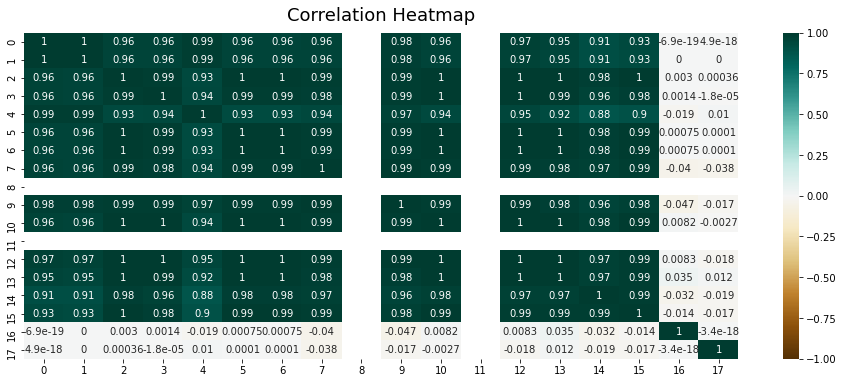

In [25]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_MinMax_sem_offset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Constatações:
- Não foram detectadas diferenças significativas nas correlações entre as variáveis após o scaling dos dados. Por esta razão, optou-se por se utilizar os dados originais, sem estes pré-processamentos.
- Baixas correlações entre as variáveis preditoras e as variáveis target podem causar alto erro nos modelos de regressão, indicando geralmente relações não-lineares ou completa ausência de relação entre as variáveis. Optou-se, então, pela utilização de algoritmos de classificação em um primeiro momento.

### Exclusão das features que não acrescentam informação ao dataset:

In [26]:
# Excluindo as features que não apresentam variabilidade
df.drop(columns=['T1', 'P1'], inplace=True)
features = df.columns
df.head()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T2,P48,P2,Pexh,TIC,mf,kMc,kMt
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


### Criação dos labels das variáveis target

In [27]:
# status_c é o status do compressor, podendo assumir valores 'Emerg', 'Alert', 'Normal'
df['status_c'] = pd.cut(df['kMc'], bins=[0, lim_emerg_comp, lim_alert_comp, float('Inf')], labels=['Emerg', 'Alert', 'Normal'])

In [28]:
# status_t é o status do compressor, podendo assumir valores 'Emerg', 'Alert', 'Normal'
df['status_t'] = pd.cut(df['kMt'], bins=[0, lim_emerg_turb, lim_alert_turb, float('Inf')], labels=['Emerg', 'Alert', 'Normal'])

In [29]:
df

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T2,P48,P2,Pexh,TIC,mf,kMc,kMt,status_c,status_t
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975,Emerg,Emerg
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975,Emerg,Emerg
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975,Emerg,Emerg
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975,Emerg,Emerg
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975,Emerg,Emerg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,628.950,2.087,10.990,1.027,23.803,0.471,1.00,1.000,Normal,Normal
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,658.853,2.512,13.109,1.031,32.671,0.647,1.00,1.000,Normal,Normal
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,680.393,2.982,15.420,1.036,42.104,0.834,1.00,1.000,Normal,Normal
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,722.029,3.594,18.293,1.043,58.064,1.149,1.00,1.000,Normal,Normal


In [30]:
df.groupby('status_c').count()['kMc']

status_c
Emerg     3978
Alert     3978
Normal    3978
Name: kMc, dtype: int64

In [31]:
df.groupby('status_t').count()['kMt']

status_t
Emerg     4131
Alert     3672
Normal    4131
Name: kMt, dtype: int64

### Constatação:
- Classes balanceadas, não se faz necessária nenhuma técnica de balanceamento do dataset (consequência da escolha arbitrária dos limiares críticos.

### Exclusão das variáveis kMc e kMt do dataset que será fornecido aos modelos de classificação, uma vez que as mesmas foram discretizadas nas variáveis status_c e status_t.

In [32]:
df2 = df.drop(columns=['kMc', 'kMt'])
df2

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T2,P48,P2,Pexh,TIC,mf,status_c,status_t
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,Emerg,Emerg
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,Emerg,Emerg
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,Emerg,Emerg
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,Emerg,Emerg
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,Emerg,Emerg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,628.950,2.087,10.990,1.027,23.803,0.471,Normal,Normal
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,658.853,2.512,13.109,1.031,32.671,0.647,Normal,Normal
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,680.393,2.982,15.420,1.036,42.104,0.834,Normal,Normal
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,722.029,3.594,18.293,1.043,58.064,1.149,Normal,Normal


## 4 - Modelagem

### Divisão dos datasets de treino e teste para as duas variáveis target status_c e status_t

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
Xc = df2.drop(columns=['status_c', 'status_t'])
yc = df2['status_c']

In [35]:
Xt = df2.drop(columns=['status_c', 'status_t'])
yt = df2['status_t']

In [36]:
# Divisão do dataset em treino e teste:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.3)

In [37]:
# Divisão do dataset em treino e teste:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.3)

In [38]:
results_c = {}
results_t = {}

### Modelo 1 - Algoritmo Decision Tree (baseline)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [40]:
import warnings
warnings.simplefilter("ignore")

In [41]:
mod1c = DecisionTreeClassifier()
mod1c.fit(Xc_train, yc_train)
yc_pred = mod1c.predict(Xc_test)

In [42]:
print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

       Alert       0.93      0.93      0.93      1212
       Emerg       0.97      0.96      0.97      1190
      Normal       0.95      0.96      0.96      1179

    accuracy                           0.95      3581
   macro avg       0.95      0.95      0.95      3581
weighted avg       0.95      0.95      0.95      3581



In [43]:
results_c['Mod-1 - Decision Tree'] = 0.96

O algoritmo baseline teve uma acurácia de 95% para o status do compressor.

In [44]:
mod1t = DecisionTreeClassifier()
mod1t.fit(Xt_train, yt_train)
mod1t.fit(Xt_train, yt_train)
yt_pred = mod1t.predict(Xt_test)

In [45]:
print(classification_report(yt_test, yt_pred))

              precision    recall  f1-score   support

       Alert       0.92      0.92      0.92      1138
       Emerg       0.95      0.95      0.95      1212
      Normal       0.96      0.96      0.96      1231

    accuracy                           0.94      3581
   macro avg       0.94      0.94      0.94      3581
weighted avg       0.94      0.94      0.94      3581



In [46]:
results_t['Mod-1 - Decision Tree'] = 0.95

O algoritmo baseline teve uma acurácia de 94% para o status da turbina.

### Modelo 2 - Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
mod2c = RandomForestClassifier()
mod2c.fit(Xc_train, yc_train)
yc_pred = mod2c.predict(Xc_test)
print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

       Alert       0.95      0.95      0.95      1212
       Emerg       0.97      0.97      0.97      1190
      Normal       0.98      0.98      0.98      1179

    accuracy                           0.97      3581
   macro avg       0.97      0.97      0.97      3581
weighted avg       0.97      0.97      0.97      3581



In [49]:
results_c['Mod-2 - Random Forest'] = 0.97

In [50]:
mod2t = RandomForestClassifier()
mod2t.fit(Xt_train, yt_train)
yt_pred = mod2t.predict(Xt_test)
print(classification_report(yt_test, yt_pred))

              precision    recall  f1-score   support

       Alert       0.95      0.95      0.95      1138
       Emerg       0.98      0.98      0.98      1212
      Normal       0.98      0.97      0.98      1231

    accuracy                           0.97      3581
   macro avg       0.97      0.97      0.97      3581
weighted avg       0.97      0.97      0.97      3581



In [51]:
results_t['Mod-2 - Random Forest'] = 0.97

O modelo Random Forest apresentou uma melhoria na acurácia (96% para o status do compressor e 97% para o status da turbina).

### Modelo 3 - K-Nearest-Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
mod3c = KNeighborsClassifier()
mod3c.fit(Xc_train, yc_train)
yc_pred = mod3c.predict(Xc_test)
print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

       Alert       0.89      0.91      0.90      1212
       Emerg       0.96      0.93      0.94      1190
      Normal       0.94      0.93      0.94      1179

    accuracy                           0.93      3581
   macro avg       0.93      0.93      0.93      3581
weighted avg       0.93      0.93      0.93      3581



In [54]:
results_c['Mod-3 - KNN'] = 0.92

In [55]:
mod3t = KNeighborsClassifier()
mod3t.fit(Xt_train, yt_train)
yt_pred = mod3c.predict(Xt_test)
print(classification_report(yt_test, yt_pred))

              precision    recall  f1-score   support

       Alert       0.31      0.34      0.33      1138
       Emerg       0.33      0.32      0.32      1212
      Normal       0.33      0.32      0.32      1231

    accuracy                           0.32      3581
   macro avg       0.32      0.32      0.32      3581
weighted avg       0.33      0.32      0.32      3581



In [56]:
results_t['Mod-3 - KNN'] = 0.31

O modelo KNN apresentou resultados piores que o baseline.

### Modelo 4 - Naive-Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
mod4c = GaussianNB()
mod4c.fit(Xc_train, yc_train)
yc_pred = mod4c.predict(Xc_test)
print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

       Alert       0.38      0.18      0.25      1212
       Emerg       0.36      0.40      0.38      1190
      Normal       0.35      0.50      0.41      1179

    accuracy                           0.36      3581
   macro avg       0.37      0.36      0.35      3581
weighted avg       0.37      0.36      0.35      3581



In [59]:
results_c['Mod-4 - NB'] = 0.33

In [60]:
mod4t = GaussianNB()
mod4t.fit(Xt_train, yt_train)
yt_pred = mod4c.predict(Xt_test)
print(classification_report(yt_test, yt_pred))

              precision    recall  f1-score   support

       Alert       0.36      0.17      0.23      1138
       Emerg       0.36      0.38      0.37      1212
      Normal       0.36      0.52      0.43      1231

    accuracy                           0.36      3581
   macro avg       0.36      0.35      0.34      3581
weighted avg       0.36      0.36      0.34      3581



In [61]:
results_t['Mod-4 - NB'] = 0.33

O modelo Naive-Bayes apresentou resultados piores que o baseline.

### Modelo 5 - SVC

In [62]:
from sklearn.svm import SVC

In [63]:
mod5c = SVC()
mod5c.fit(Xc_train, yc_train)
yc_pred = mod5c.predict(Xc_test)
print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

       Alert       0.34      0.18      0.23      1212
       Emerg       0.32      0.33      0.33      1190
      Normal       0.34      0.50      0.40      1179

    accuracy                           0.33      3581
   macro avg       0.34      0.34      0.32      3581
weighted avg       0.34      0.33      0.32      3581



In [64]:
results_c['Mod-5 - SVC'] = 0.11

In [65]:
mod5t = GaussianNB()
mod5t.fit(Xt_train, yt_train)
yt_pred = mod5c.predict(Xt_test)
print(classification_report(yt_test, yt_pred))

              precision    recall  f1-score   support

       Alert       0.35      0.18      0.24      1138
       Emerg       0.34      0.33      0.33      1212
      Normal       0.35      0.52      0.42      1231

    accuracy                           0.35      3581
   macro avg       0.35      0.35      0.33      3581
weighted avg       0.35      0.35      0.33      3581



In [66]:
results_t['Mod-5 - SVC'] = 0.11

O modelo SVC apresentou resultados piores que o baseline.

### Modelo 6 - Adaboost Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
mod6c = AdaBoostClassifier()
mod6c.fit(Xc_train, yc_train)
yc_pred = mod6c.predict(Xc_test)
print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

       Alert       0.50      0.84      0.63      1212
       Emerg       0.85      0.47      0.61      1190
      Normal       0.88      0.66      0.75      1179

    accuracy                           0.66      3581
   macro avg       0.74      0.66      0.66      3581
weighted avg       0.74      0.66      0.66      3581



In [69]:
results_c['Mod-6 - AdaBoost'] = 0.78

In [70]:
mod6t = AdaBoostClassifier()
mod6t.fit(Xt_train, yt_train)
yt_pred = mod6c.predict(Xt_test)
result = classification_report(yt_test, yt_pred)
print(result)

              precision    recall  f1-score   support

       Alert       0.29      0.53      0.38      1138
       Emerg       0.32      0.17      0.22      1212
      Normal       0.26      0.19      0.22      1231

    accuracy                           0.29      3581
   macro avg       0.29      0.30      0.27      3581
weighted avg       0.29      0.29      0.27      3581



In [71]:
results_t['Mod-6 - AdaBoost'] = 0.32

O modelo AdaBoostClassifier apresentou resultados piores que o baseline.

## 5 - Avaliação dos Resultados (Evaluation)

A métrica utilizada para avaliação do modelo será a revocação (recall) da classe 'Emerg'. Isto porque mede o quanto o modelo é sensível para detectar o caso mais crítico, que é quando a manutenção tem que ser executada de maneira emergencial.

![recall](img/recall.png)

In [72]:
results_c

{'Mod-1 - Decision Tree': 0.96,
 'Mod-2 - Random Forest': 0.97,
 'Mod-3 - KNN': 0.92,
 'Mod-4 - NB': 0.33,
 'Mod-5 - SVC': 0.11,
 'Mod-6 - AdaBoost': 0.78}

In [73]:
results_t

{'Mod-1 - Decision Tree': 0.95,
 'Mod-2 - Random Forest': 0.97,
 'Mod-3 - KNN': 0.31,
 'Mod-4 - NB': 0.33,
 'Mod-5 - SVC': 0.11,
 'Mod-6 - AdaBoost': 0.32}

Neste caso, tanto para previsão do status do compressor quanto para turbina, o modelo com melhores resultados foi o Random Forest, segundo modelo a ser testado.

### Próximos passos

Próximos passos:
- Otimização de hiperparâmetros do modelo Random Forest;
- CrossValidation do modelo otimizado;
- Elaboração do relatório do projeto.